In [1]:
%%html
<style>
    table {
        margin-left: 0 !important;
        margin-right: auto !important;
        text-align: left;
    }
    th, td {
        text-align: left !important;
    }
</style>

# Scikit-Learn
## [Linear Regression](https://en.wikipedia.org/wiki/Linear_regression) 

In [2]:
import configs.scikit as sk
from sklearn.datasets import fetch_california_housing

### California Housing Prediction

A specific example of linear regression can be seen below.

**Goal**: Predict how expensive a house will be (it's price) based on only knowing the district's median income. 

<div style="text-align: left; display: inline-block;">
$$
\hat{y} = \theta_1 \cdot \text{MedInc} + \theta_0
$$
</div>
<br>
<br>

**Where:**

- $\widehat{y}$ = Predicted median house value (in \$100ks)  
- $\text{MedInc}$ = Median income in the block group  
- $\theta_1$ = Model coefficient (slope)  
- $\theta_0$ = Model intercept (bias)

#### Data

Using the available [sklearn datasets](https://scikit-learn.org/stable/api/sklearn.datasets.html), you can quickly load a data set, train a model, then use it to make predictions.

| Variable   | What It Contains           | Shape (Approx) | Purpose                           |
| ---------- | -------------------------- | -------------- | --------------------------------- |
| `X`        | All 8 features             | `[20640, 8]`   | All features (columns) of data set|
| `y`        | Target: median house value | `[20640]`      | The value we're predicting (house value)|
| `X_single` | Only the `MedInc` feature  | `[20640, 1]`   | Selected feature for simple regression  |


In [3]:
data = fetch_california_housing()
X = sk.pd.DataFrame(data.data, columns=data.feature_names)
y = data.target # median house value in $100,000s
X_single = X[['MedInc']]

#### Training

During training, the model looks at the California housing data set — identifying the relationship between two columns:

- **Input Column:** Median Income (\(\text{MedInc}\))  
- **Output Column:** Median House Value (\(\text{MedHouseVal}\))

It tries to find the best-fitting line that predicts house value from income. Mathematically, it finds two parameters:

<div style="text-align: left; display: inline-block;">
$$
\hat{y} = \theta_1 \times \text{MedInc} + \theta_0
$$
</div>

<br>
<br>

**Where:**

| Parameter      | Meaning                                               |
|----------------|-------------------------------------------------------|
| $\theta_1$   | slope (how much house value changes per unit income) |
| $\theta_0$   | intercept (predicted value when income is zero)       |

The model picks $\theta_0$, $\theta_1$ to minimize the squared differences between actual house values and predicted ones on the training data.

In [4]:
lr = sk.LinearRegression(data, X, y, X_single)
lr.train()

#### Predict Values



If we measure a median income value of $65,000, then we will predict the 

In [5]:
X_single_df = sk.pd.DataFrame([[6.5]], columns=['MedInc'])
predicted_value = lr.model.predict(X_single_df)
print(f'Predicted median house value: ${predicted_value[0] * 100_000:.2f}')

Predicted median house value: $317029.75


### Evaluate Model Performance

| Metric                 | Description                                              | Good Score Indicator                            |
|------------------------|----------------------------------------------------------|------------------------------------------------|
| Mean Squared Error (MSE) | Average squared difference between actual and predicted values. Lower is better. Units are squared of target variable. | Closer to 0 (lower is better)                   |
| R-squared $R^2$    | Proportion of variance explained by the model. Ranges from $-\infty$ to 1. | Closer to 1 (higher is better).           |
| Model Coefficient      | The slope $\theta_1$ showing how much the target changes for one unit change in the feature (Median Income). | The sign and magnitude depend on data; consistent with domain knowledge is good. |
| Model Intercept        | The intercept $\theta_0$ representing the predicted target value when feature is zero. | Value should make sense in context (e.g., house value at zero income). |

In [6]:
print(f'Mean Squared Error: {lr.mse:.2f}')
print(f'R² Score: {lr.r2:.2f}')
print(f'Model Coefficient: {lr.model.coef_[0]:.2f}')
print(f'Model Intercept: {lr.model.intercept_:.2f}')

Mean Squared Error: 0.71
R² Score: 0.46
Model Coefficient: 0.42
Model Intercept: 0.44


#### Interpretations

An MSE of **0.71** on the California housing model means:

- On average, the squared difference between predicted and actual median house values (in units of $\$100,000^2$) is 0.71.  
- Taking the square root to get:
    - $\text{RMSE} = \sqrt{0.71} \approx 0.84$
- Predictions are off by about:
    - $0.84 \times \$100,000 = \$84,000$ on average.


The $R^2$ score (coefficient of determination) measures how well your model explains the variability in the target data.

- It ranges from $\infty$ to 1.
- An $R^2$ value close to 1 means the model explains most of the variance.
- An $R^2$ value of 0 means the model does no better than predicting the mean.
- Negative values mean the model performs worse than simply predicting the mean.

For example, the model’s $R^2$ of 0.46 means that the model explains **~46%** of the variance in median house values using median income alone. This is a moderate fit, capturing some relationship but leaving more than half of the variation unexplained.

**To improve predictive power, we could:**
- Add more features (like location, house size, age, etc.)  
- Use more advanced models that capture nonlinear relationships (keep reading)
- Engineer new features to better represent the data

#### Visualization

The plot below displays how well the linear regression model fits actual housing data by showing:

- Observed data points from the california housing data set (blue)
- Predicted values that form the regression line (red)

It is designed to help you understand if the model reasonably explains how median income relates to house prices.

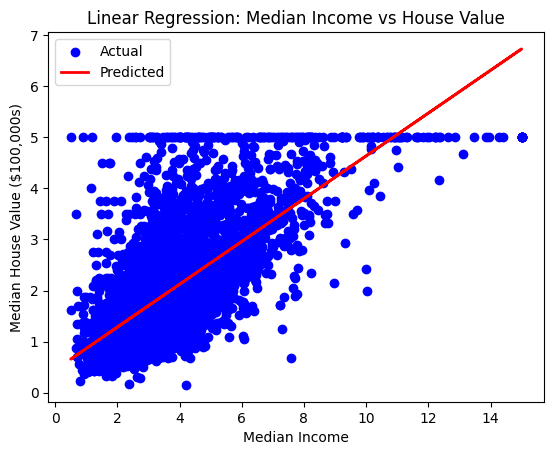

In [7]:
lr.plot()

## [Logistic Regression](https://en.wikipedia.org/wiki/Logistic_regression)

### Breast Cancer Classification

**Goal:** Predict whether a tumor is malignant or benign (binary classification) using ~30 features from a data set originally collected by Dr. William H. Wolberg at the University of Wisconsin Hospitals, Madison.

**🧬 Description:**
- Samples: 569 patients
- Classes:
    - 0: Malignant (212 cases)
    - 1: Benign (357 cases)
- Features: 30 numeric features computed from digitized images of fine needle aspirate (FNA) of breast masses. Each feature describes characteristics of the cell nuclei present in the image. Examples include: radius_mean, texture_mean, smoothness_worst, area_mean, etc.

In [8]:
from sklearn.datasets import load_breast_cancer

In [9]:
data = load_breast_cancer()
X, y = data.data, data.target

In [10]:
clf = sk.LogisticRegressionClassifier(X, y)
clf.train()
clf.evaluate()
clf.summary()

Logistic Regression Performance
--------------------------------
Accuracy:  0.96
Precision: 0.95
Recall:    0.99
F1 Score:  0.97

Confusion Matrix:
 [[39  4]
 [ 1 70]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



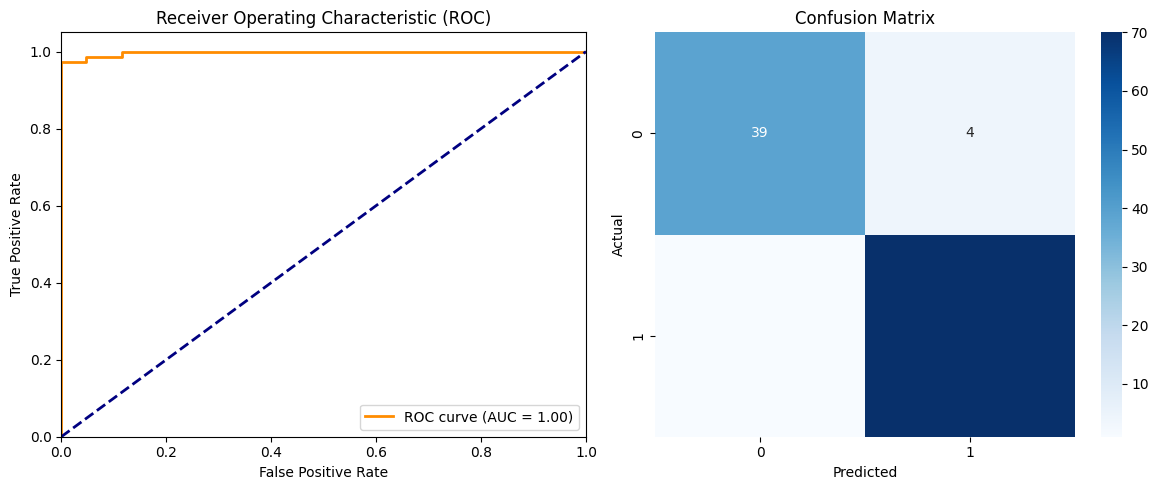

In [11]:
clf.plot_evaluation()

## K-Nearest Neighbors

In [12]:
# code

## Decision Trees

In [13]:
# more code

## Naive Bayes

In [14]:
# naive code

## Support Vector Machines (SVM)

In [15]:
# StillVectorizedMachinecode

## Random Forests

In [16]:
# RandomCodeFun

## Gradient Boosting (XGBoost, LightGBM)

In [17]:
# https://youtu.be/1Apk4lGg008?si=QTNRyZcbUa6njtHb

# Specialization & Application

- Feature Engineering: Handling missing values, categorical encoding, scaling
- Pipelines: Automate workflows (sklearn.pipeline)
- Hyperparameter Tuning: Grid search, random search, Bayesian optimization
- Ensemble Methods: Bagging, boosting, stacking